In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2586 - accuracy: 0.9246
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1047 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0705 - accuracy: 0.9780


In [2]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_acc, val_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.1131 - accuracy: 0.9647
0.9646999835968018 0.11312060803174973


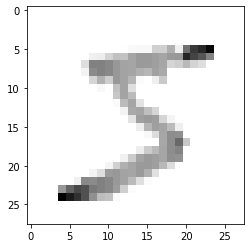

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

print(X_train[0])

In [4]:
model.save('epic_num.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num.model/assets


In [5]:
new_model = tf.keras.models.load_model('epic_num.model')

In [6]:
import numpy as np


predictions = new_model.predict(np.array(X_test))
print(predictions)

[[3.0757944e-06 6.2525783e-06 8.0093887e-06 ... 9.9984992e-01
  7.0813132e-07 4.4578857e-05]
 [1.6211430e-07 1.1325042e-03 9.9885702e-01 ... 2.2005771e-08
  6.7342604e-08 3.0088390e-10]
 [7.5249638e-08 9.9994814e-01 3.2677308e-06 ... 1.1630144e-05
  2.4376955e-05 2.0471316e-06]
 ...
 [2.2270216e-08 8.5880134e-07 3.2493332e-08 ... 3.2480291e-04
  5.6090889e-06 4.2446400e-03]
 [7.7993518e-06 1.9686092e-07 5.9692070e-08 ... 2.0224529e-06
  1.0018245e-03 4.8704543e-09]
 [1.9855694e-04 1.7715076e-06 2.5368367e-06 ... 2.7073179e-08
  4.2903125e-07 3.2176391e-08]]


In [7]:
print(np.argmax(predictions[0]))

7


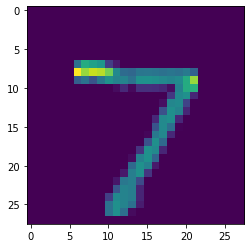

In [8]:
plt.imshow(X_test[0])
plt.show()